# Convolve the photon image for Cu K$\alpha$ line


In [7]:
import os
import numpy as np

from astropy.io import fits
from astropy.wcs import WCS
from astropy.visualization import PercentileInterval, ImageNormalize, AsinhStretch, LogStretch, LinearStretch
from astropy.convolution import convolve, Kernel, Gaussian2DKernel

%matplotlib inline
import matplotlib.pyplot as plt

In [8]:
home = os.path.expanduser('~')
ffile = f"{home}/IVAN/Cu-line/0721010501/PN_LW/pn_image_7900_8100_S003.fits"

In [9]:
hdu = fits.open(ffile)

In [10]:
hdu.info()

Filename: /home/ivaltchanov/IVAN/Cu-line/0721010501/PN_LW/pn_image_7900_8100_S003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     165   (648, 648)   int16   
  1  STDGTI01      1 BinTableHDU    226   15R x 2C   [D, D]   
  2  STDGTI02      1 BinTableHDU    226   15R x 2C   [D, D]   
  3  STDGTI03      1 BinTableHDU    226   15R x 2C   [D, D]   
  4  STDGTI04      1 BinTableHDU    226   15R x 2C   [D, D]   
  5  STDGTI05      1 BinTableHDU    226   15R x 2C   [D, D]   
  6  STDGTI06      1 BinTableHDU    226   15R x 2C   [D, D]   
  7  STDGTI07      1 BinTableHDU    226   15R x 2C   [D, D]   
  8  STDGTI08      1 BinTableHDU    226   15R x 2C   [D, D]   
  9  STDGTI09      1 BinTableHDU    226   15R x 2C   [D, D]   
 10  STDGTI10      1 BinTableHDU    226   16R x 2C   [D, D]   
 11  STDGTI11      1 BinTableHDU    226   16R x 2C   [D, D]   
 12  STDGTI12      1 BinTableHDU    226   16R x 2C   [D, D]   


In [19]:
#
# now smooth the image
#
image = hdu[0].data
wcs = WCS(hdu[0].header)
#
pix = wcs.wcs.cdelt[1]*3600.0 # pixel size in arcsec
fwhm = 15.0/pix
conv = np.sqrt(8.0*np.log(2.0))
stdev = fwhm/conv
gauss = Gaussian2DKernel(x_stddev=stdev, y_stddev=stdev)
cu_sm15 = convolve(image,gauss)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


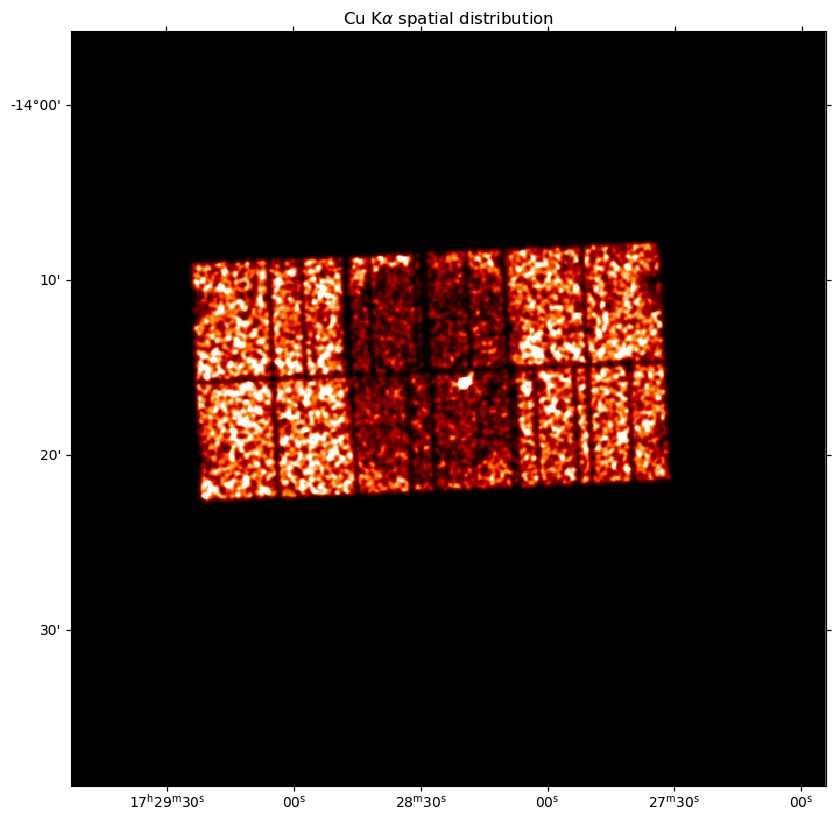

In [26]:
fig = plt.figure(figsize=(10,10),dpi=100)
pp = 98.0 # colour cut percentage
ax = fig.add_subplot(111,projection=wcs)
ax.set_title("Cu K$\\alpha$ spatial distribution")
norm = ImageNormalize(cu_sm15,interval=PercentileInterval(pp), stretch=LinearStretch())
ax.imshow(cu_sm15,cmap=plt.get_cmap('gist_heat'),norm=norm,origin='lower',interpolation='nearest')
plt.xlabel = ''
plt.ylabel = ''
plt.savefig(f"{home}/IVAN/Cu-line/cuka_spatial.png",dpi=100)